<a href="https://colab.research.google.com/github/Ishita2502/Titanic/blob/main/Titanic_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
path='/gdrive/My Drive/Data Science/'

In [ ]:
raw_data=pd.read_csv(path+'train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
raw_data.shape

(891, 12)

In [ ]:
raw_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
missing=raw_data.isnull().mean()*100

In [ ]:
missing_array=np.array(missing)
print (missing_array)

[ 0.          0.          0.          0.          0.         19.86531987
  0.          0.          0.          0.         77.1043771   0.22446689]


In [ ]:
for i in missing_array:
  if (i>10):
    print (i)

19.865319865319865
77.10437710437711


In [ ]:
data=raw_data.drop(['Cabin'],axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


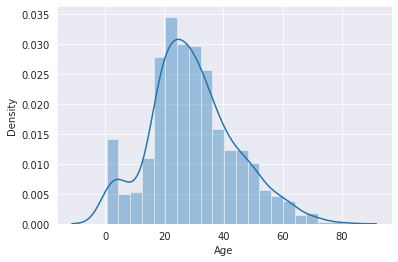

In [ ]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(data['Age'])

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


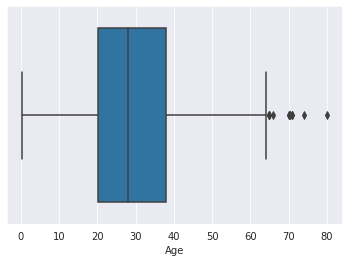

In [ ]:
sns.boxplot(x=data['Age'])

In [ ]:
data['Age'].mode()

0    24.0
dtype: float64

In [ ]:
data['Age'].mean()

29.69911764705882

In [ ]:
data['Age'].median()

28.0

In [ ]:
data['Age'].std()

14.526497332334044

In [ ]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [ ]:
data['Age'].isnull().sum()

0

In [ ]:
data['Age'].std()

13.002015226002884

In [ ]:
data['Embarked'].mode()

0    S
dtype: object

In [ ]:
data['Embarked']=data['Embarked'].fillna('S')

In [ ]:
data['Embarked'].isnull().sum()

0

In [ ]:
data['Embarked'].nunique()

3

In [ ]:
data[:].nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [ ]:
data=data.drop(['PassengerId','Name'],axis=1)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Embarked']=label_encoder.fit_transform(data['Embarked'])

In [ ]:
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [ ]:
data.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,2
1,1,1,0,38.000000,1,0,PC 17599,71.2833,0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,1,1,0,35.000000,1,0,113803,53.1000,2
4,0,3,1,35.000000,0,0,373450,8.0500,2
5,0,3,1,29.699118,0,0,330877,8.4583,1


In [ ]:
data['Fare'].max()

512.3292

In [ ]:
data['Fare'].min()

0.0

In [ ]:
data['Age'].max()

80.0

In [ ]:
data['Age'].min()

0.42

In [ ]:
xinput=data.drop(['Survived','Ticket'],axis=1)
xinput.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
youtput=data['Survived']
youtput.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xinput_scaled = scaler.fit_transform(xinput)

In [ ]:
print(xinput_scaled.mean(axis=0))

[-8.77213254e-17 -1.15632656e-16  2.23290646e-16  4.38606627e-17
  5.38289951e-17  3.98733297e-18 -4.98416622e-17]


In [ ]:
print(xinput_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.feature_selection import VarianceThreshold
v_threshold=VarianceThreshold(threshold=0.5)
v_threshold.fit(xinput)
v_threshold.get_support()

array([ True, False,  True,  True,  True,  True,  True])

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(xinput,youtput)
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1])

ValueError: ignored

In [ ]:
feat_importances.plot(kind='barh',color='teal')
plt.show()

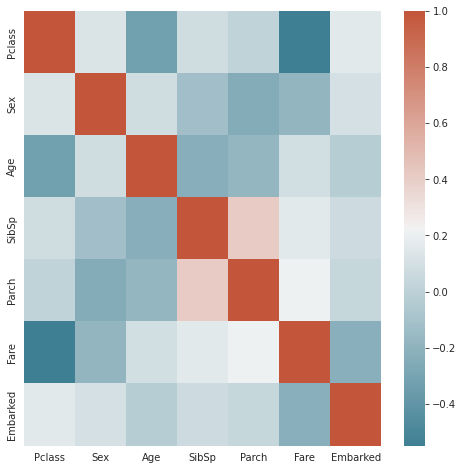

In [ ]:
corrmat = xinput.corr(method='pearson')

# we can make a heatmap with the package seaborn
# and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# some more parameters for the figure
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

# and now plot the correlation matrix
sns.heatmap(corrmat, cmap=cmap)

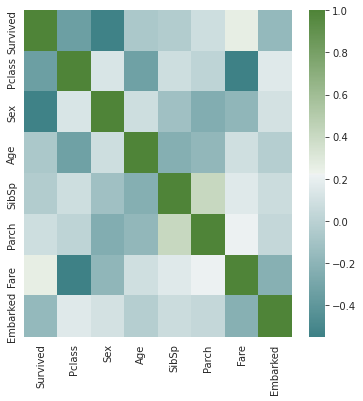

In [ ]:
corrmat = data.corr(method='pearson')

# we can make a heatmap with the package seaborn
# and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(200, 120, as_cmap=True)

# some more parameters for the figure
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

# and now plot the correlation matrix
sns.heatmap(corrmat, cmap=cmap)

In [ ]:
c = 0

# iterate over each correlation value for var_5:
for i in corrmat.loc['Survived']:

    # print the variable name and the correlation coefficient
    print(corrmat.columns[c], i)

    c = c +1

Survived 1.0
Pclass -0.33848103596101586
Sex -0.5433513806577526
Age -0.06980851528714269
SibSp -0.03532249888573588
Parch 0.08162940708348222
Fare 0.2573065223849618
Embarked -0.16767531386772003


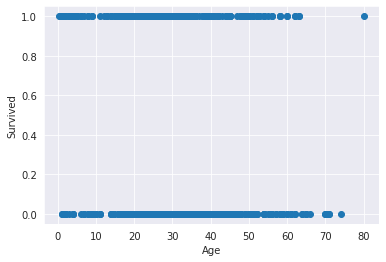

In [ ]:
plt.scatter(data['Age'], data['Survived'])
plt.ylabel('Survived')
plt.xlabel('Age')
plt.show()

In [ ]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = xinput.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Pclass,Fare,0.549500
1,Fare,Pclass,0.549500
2,Parch,SibSp,0.414838
3,SibSp,Parch,0.414838
4,Pclass,Age,0.331339


In [ ]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(xinput, youtput)
mi

array([0.02885026, 0.15312256, 0.03171   , 0.02124597, 0.02957922,
       0.13693687, 0.01064675])

Text(0, 0.5, 'Mutual Information')

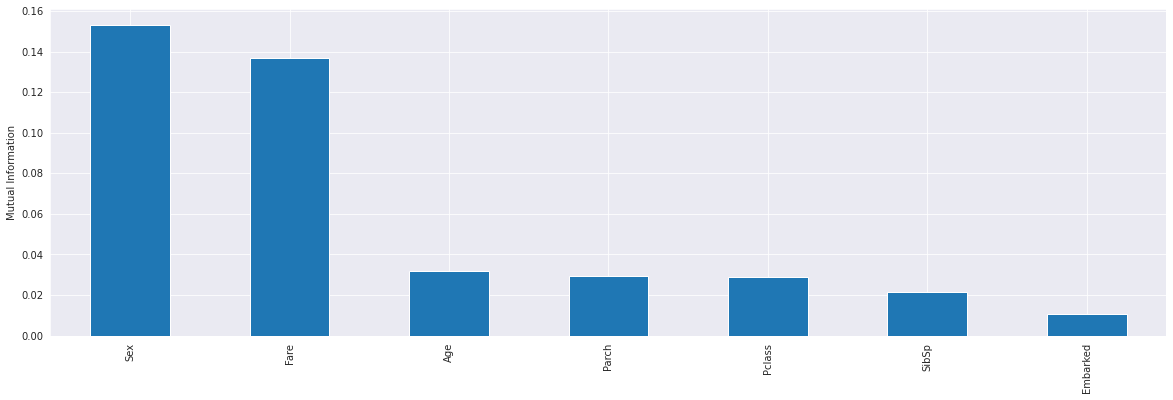

In [ ]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = xinput.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [ ]:
# here we will select the top 4 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=4).fit(xinput, youtput)

# display features
xinput.columns[sel_.get_support()]

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [ ]:
#Chi square test
xchi=data[['Embarked','Pclass','Sex','Parch','SibSp']]
ychi=data['Survived']

from sklearn.feature_selection import chi2

# to select the features
from sklearn.feature_selection import SelectKBest

# calculate the chi2 p_value between each of the variables
# and the target

# chi2 returns 2 arrays, one contains the F-Scores which are then
# evaluated against the chi2 distribution to obtain the pvalue.
# The pvalues are in the second array

f_score = chi2(xchi, ychi)

# the 2 arrays of values
f_score

(array([10.20252466, 30.87369944, 92.70244698, 10.09749911,  2.58186538]),
 array([1.40248517e-03, 2.75378563e-08, 6.07783826e-22, 1.48470676e-03,
        1.08094210e-01]))

In [ ]:
# 1) let's capture the p_values (in the second array, remember python indexes at 0) in a pandas Series
# 2) add the variable names in the index
# 3) order the variables based on their fscore

pvalues = pd.Series(f_score[1])
pvalues.index = xchi.columns
pvalues.sort_values(ascending=True)

Sex         6.077838e-22
Pclass      2.753786e-08
Embarked    1.402485e-03
Parch       1.484707e-03
SibSp       1.080942e-01
dtype: float64

In [ ]:
sel_1 = SelectKBest(chi2, k=3).fit(xchi, ychi)

# display features
xchi.columns[sel_1.get_support()]

Index(['Embarked', 'Pclass', 'Sex'], dtype='object')

In [ ]:
#ANOVA
# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
xanova=data[['Fare','Age']]
yanova=data['Survived']

In [ ]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(xanova, yanova)

univariate

(array([63.03076423,  4.35351609]), array([6.12018934e-15, 3.72170837e-02]))

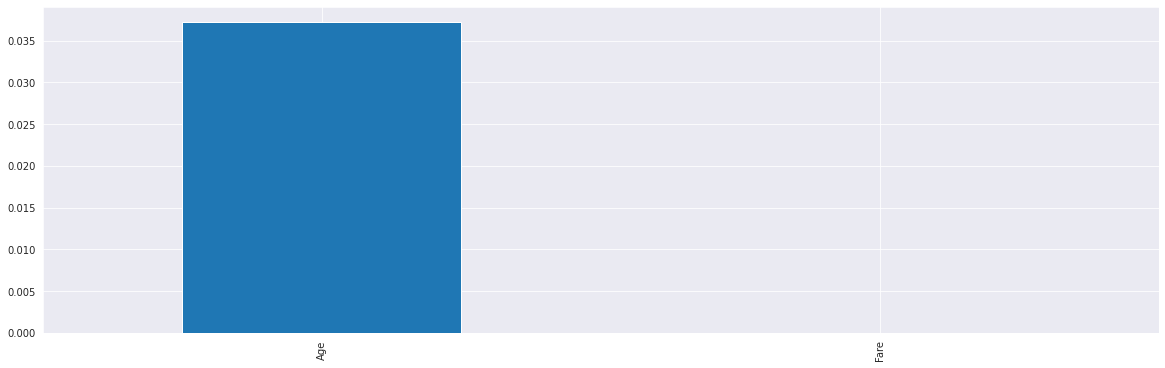

In [ ]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = xanova.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [ ]:
# select the top feature
sel_2 = SelectKBest(f_classif, k=1).fit(xanova, yanova)

# display selected feature names
xanova.columns[sel_2.get_support()]

Index(['Fare'], dtype='object')